<a href="https://www.kaggle.com/code/mrsimple07/classification-for-beginners?scriptVersionId=163688900" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apple-quality/apple_quality.csv


**In this notebook, we are going to learn about Classification algorithm**
- These algorithms play a pivotal role in various applications, ranging from spam detection to medical diagnosis.
- In classification algorithm, we have to classify the target into groups
- For example: Yes/no, good/bad, 1/0, pass/fail and so on...

In this example we are going to see the apply quality dataset

In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/apple-quality/apple_quality.csv')
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


As we can see our target value is good/bad quality of apples

**Let's first we explore the data**

In [3]:
df.shape

(4001, 9)

In [4]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


Missing values in our data:

In [5]:
df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [6]:
#Dropping the missing values
df = df.dropna()
df.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

We can replace the quality column - good/bad with 1/0 to make easier to work with them

In [7]:
df['Quality'] = df['Quality'].str.replace('good', '1').str.replace('bad', '0').astype(int)

In [8]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1


Some visualizations to understand the data

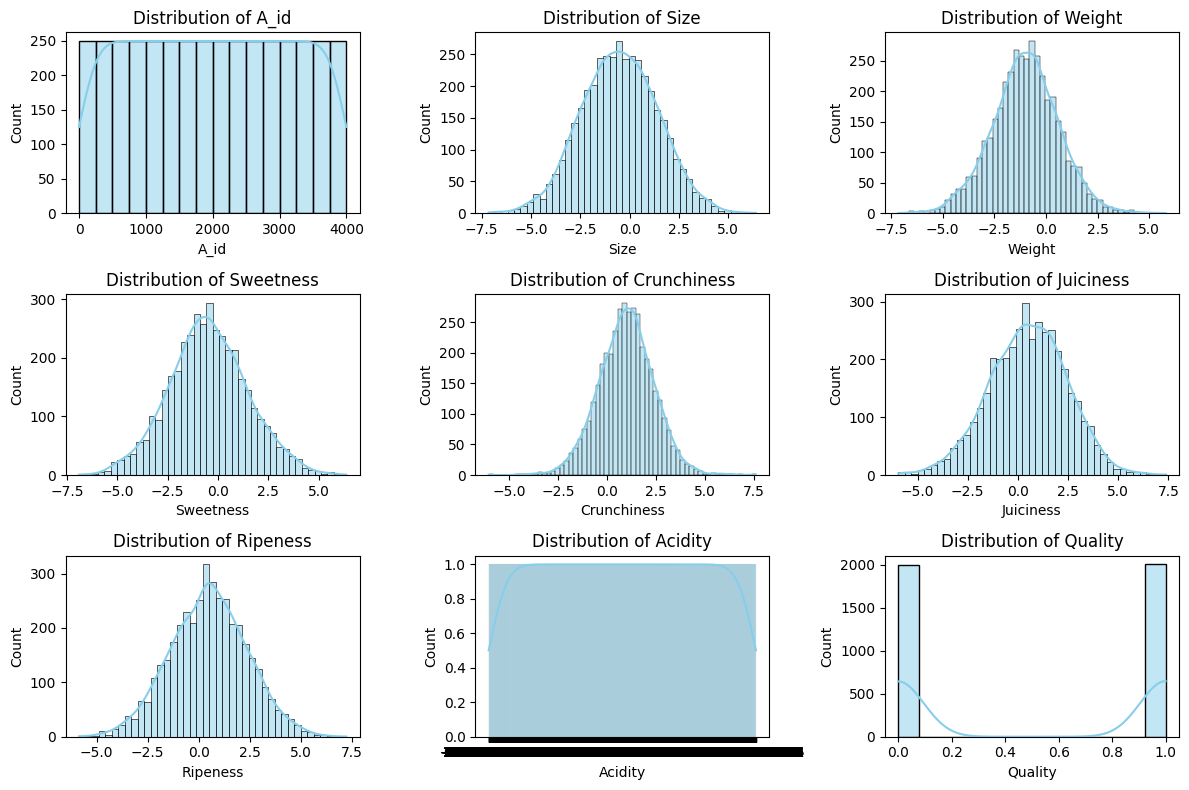

In [9]:
#The distribution of each data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

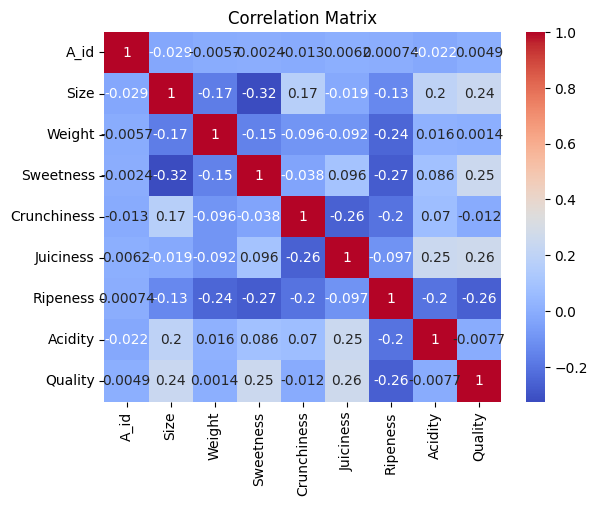

In [10]:
#Correlation matrix
import seaborn as sns

corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

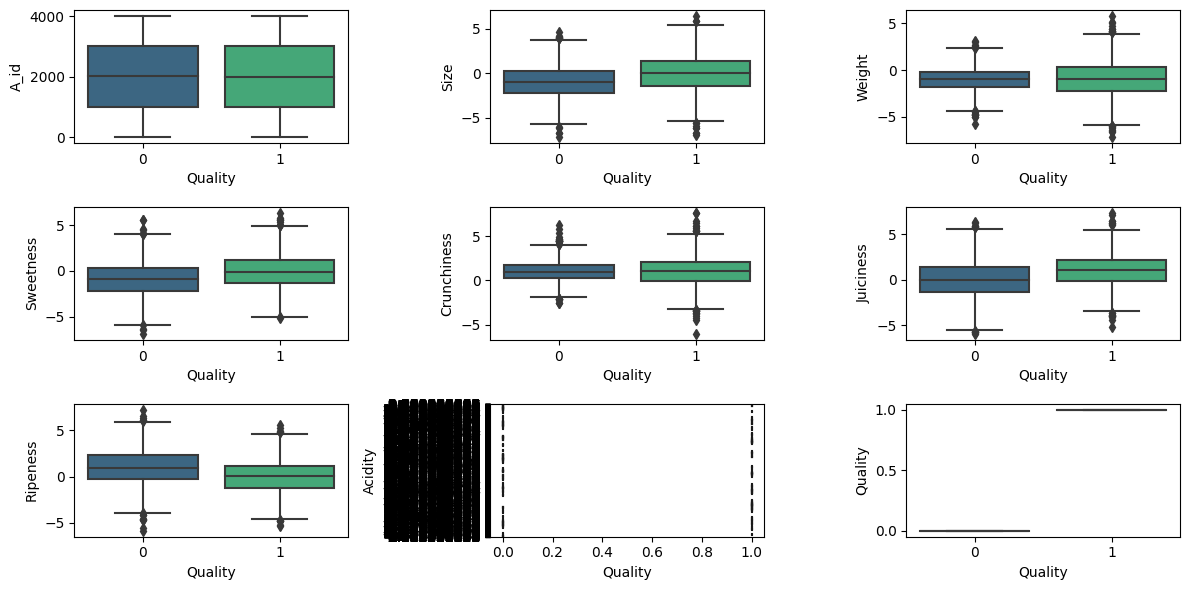

In [11]:
#Visualizing the relationship between features and target value

plt.figure(figsize = (12,6))
for i, col in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    sns.boxplot(x = 'Quality', y = col, data= df, palette = 'viridis')
    
plt.tight_layout()
plt.show()

**We explored the data. And now time to build our model to predict the quality of apples!**

For this we can use different models:
- Logistic Regression
- Decision Tree
- Ensemble algorithms: Random Forest

In [12]:
#LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

warnings.filterwarnings('ignore')

X = df.drop('Quality', axis =1)
y = df['Quality']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print(accuracy_score(y_test, y_pred_log))
print(classification_report(y_test,y_pred_log))

0.75375
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       401
           1       0.77      0.72      0.75       399

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



In [13]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test,y_pred_dt))

0.81625
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       401
           1       0.82      0.80      0.81       399

    accuracy                           0.82       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.82      0.82      0.82       800



In [14]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test,y_pred_rf))

0.8925
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       401
           1       0.89      0.90      0.89       399

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800



**Some theory**

As we can see, we have following results:
- Logistic Regression: 0.75375
- Decision Tree Classifier: 0.8125
- Random Forest Classifier: 0.89625


Why? Because:
- Logistic Regression is a linear model that assumes a linear relationship between the features and the log-odds of the target variable. If the underlying relationship in the data is not well approximated by a linear function, Logistic Regression may not capture complex patterns, leading to moderate accuracy.
- Decision Trees are capable of capturing non-linear relationships and can handle complex decision boundaries. This model might have performed better than Logistic Regression due to its ability to create more flexible decision rules based on feature values.
- Random Forest is an ensemble of decision trees, which often leads to improved accuracy and robustness. By combining predictions from multiple decision trees, Random Forest can better generalize to different patterns in the data and reduce overfitting.

*In real life problems we have to check different algorithms to find the best one. The choice of the "best" model depends on the specific characteristics of your dataset, the complexity of the underlying patterns, and the trade-off between interpretability and accuracy.*